In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [7]:
df.shape

(5572, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
#rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

target                                               text
4573    ham                           :( but your not here....
1898    ham                    Wat would u like 4 ur birthday?
421    spam  Someone has contacted our dating service and e...
1123    ham                Good morning princess! How are you?
2693    ham  All these nice new shirts and the only thing I...

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(403)

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

<Axes: xlabel='target', ylabel='count'>

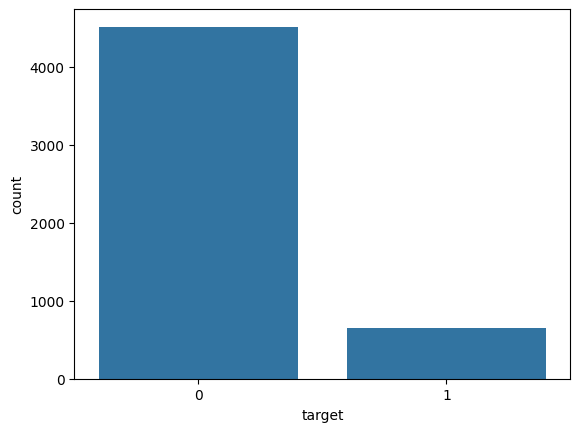

In [19]:
sns.countplot(data=df,x='target')

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Separate in x and y


In [21]:
X=df['text'].values
y=df['target'].values

Train and test split


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [23]:
X_train.shape

(4135,)

In [24]:
X_test.shape

(1034,)

In [25]:
y_train.shape

(4135,)

In [26]:
y_test.shape

(1034,)

Preprocessing

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv=CountVectorizer()
x_train=cv.fit_transform(X_train)

In [29]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4135, 7594))

In [30]:
len(x_train.toarray())

4135

In [31]:
len(x_train.toarray()[0])

7594

Train by ML Algorithm

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()


In [33]:
nb.fit(x_train,y_train)

MultinomialNB()

In [34]:
x_test=cv.transform(X_test)

In [35]:
len(x_test.toarray())

1034

In [36]:
len(x_test.toarray()[0])

7594

In [37]:
y_pred=nb.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print("Testing Accuracy:")
accuracy_score(y_pred,y_test)

Testing Accuracy:


0.9816247582205029

In [40]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.9929866989117292

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))



Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.97      0.90      0.93       149

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



Lets test using some emails

In [42]:
email=['Hey, Jack whats up dude? Tomorrow pls meet with me at my home']

In [43]:
clean_email=cv.transform(email)

In [44]:
len(clean_email.toarray()[0])

7594

In [45]:
check=nb.predict(clean_email)[0]

In [46]:
print(check)

0


Evaluation Function

In [47]:
email=['Hey i am Elon Musk. Get a brand new car from Tesla']

clean_email=cv.transform(email)
check=nb.predict(clean_email)[0]

if check ==0:
    print("this is a ham email")

else:
    print("this is a spam email")

this is a ham email
